In [1]:
import pandas as pd
from sqlalchemy import create_engine
from config import user, db_password, host, database

In [2]:
engine = create_engine(f"postgres://{user}:{db_password}@{host}:5432/{database}")

In [3]:
agg_data_df = pd.read_sql_query("""select *
from flu_percentages_melted_csv fpmc
join population_density_melted_csv pdmc 
on fpmc.state = pdmc.state and fpmc."year" = pdmc."year"
join gdp_melted_csv gmc  
on fpmc.state = gmc.state and fpmc."year" = gmc."year"
join pci_melted_csv pmc 
on fpmc.state = pmc.state and fpmc."year" = pmc."year"
join uninsured_rate_melted_csv urmc 
on fpmc.state = urmc.state and fpmc."year" = urmc."year";""",con=engine)

agg_data_df.head()

,state,year,flu_per,state,year,pop_dens,state,year,gdp,state,year,pci,state,year,uni_per
0,Alabama,2016,0.237400,Alabama,2016,96.03,Alabama,2016,191523,Alabama,2016,39536.0,Alabama,2016,9.1
1,Alaska,2016,0.143367,Alaska,2016,1.30,Alaska,2016,53289,Alaska,2016,56302.0,Alaska,2016,14.0
2,Arizona,2016,0.322227,Arizona,2016,61.10,Arizona,2016,291259,Arizona,2016,40801.0,Arizona,2016,10.0
3,Arkansas,2016,0.096424,Arkansas,2016,57.46,Arkansas,2016,113490,Arkansas,2016,40385.0,Arkansas,2016,7.9
4,California,2016,0.112745,California,2016,251.43,California,2016,2519133,California,2016,58048.0,California,2016,7.3


In [4]:
agg_data_df = agg_data_df.loc[:,~agg_data_df.columns.duplicated()]
agg_data_df

,state,year,flu_per,pop_dens,gdp,pci,uni_per
0,Alabama,2016,0.237400,96.03,191523,39536.0,9.1
1,Alaska,2016,0.143367,1.30,53289,56302.0,14.0
2,Arizona,2016,0.322227,61.10,291259,40801.0,10.0
3,Arkansas,2016,0.096424,57.46,113490,40385.0,7.9
4,California,2016,0.112745,251.43,2519133,58048.0,7.3
...,...,...,...,...,...,...,...
195,Virginia,2019,1.670068,216.14,489168,59657.0,7.9
196,Washington,2019,0.142418,114.59,548686,64758.0,6.6
197,West Virginia,2019,0.647212,74.55,72340,42315.0,6.7
198,Wisconsin,2019,0.305250,107.51,308044,53227.0,5.7


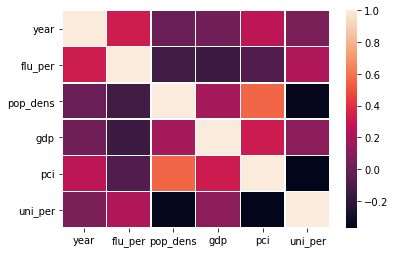

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig2 = plt.figure()
ax = sns.heatmap(agg_data_df.corr(), linewidths=.5)
fig2.savefig('heatmap.png')

In [6]:
agg_data_df.columns

Index(['state', 'year', 'flu_per', 'pop_dens', 'gdp', 'pci', 'uni_per'], dtype='object')

In [7]:
agg_data_2019_df = agg_data_df.iloc[150:200, :]
agg_data_2019_df

,state,year,flu_per,pop_dens,gdp,pci,uni_per
150,Alabama,2019,1.401620,96.81,200829,44145.0,9.7
151,Alaska,2019,1.127613,1.28,53255,62806.0,12.2
152,Arizona,2019,0.281698,64.08,323597,46058.0,11.3
153,Arkansas,2019,0.196799,58.00,117447,44629.0,9.1
154,California,2019,0.132136,253.64,2800505,66619.0,7.7
155,Colorado,2019,1.150478,55.56,356280,61157.0,8.0
156,Connecticut,2019,0.479541,736.25,251329,77289.0,5.9
157,Delaware,2019,0.056687,499.71,64319,54485.0,6.6
158,Florida,2019,0.137403,400.52,963255,52426.0,13.2
159,Georgia,2019,1.283805,184.61,547422,48236.0,13.4


In [8]:
#agg_data_df.loc[(agg_data_df["year"] == "2019")] 

In [9]:
agg_data_train_df = agg_data_df.drop(agg_data_df.index[150:200], axis=0)
print(agg_data_train_df)

             state  year   flu_per  pop_dens      gdp      pci  uni_per
0          Alabama  2016  0.237400     96.03   191523  39536.0      9.1
1           Alaska  2016  0.143367      1.30    53289  56302.0     14.0
2          Arizona  2016  0.322227     61.10   291259  40801.0     10.0
3         Arkansas  2016  0.096424     57.46   113490  40385.0      7.9
4       California  2016  0.112745    251.43  2519133  58048.0      7.3
..             ...   ...       ...       ...      ...      ...      ...
145       Virginia  2018  1.537026    215.28   478835  57964.0      8.8
146     Washington  2018  0.046226    113.22   524486  62209.0      6.4
147  West Virginia  2018  0.499809     75.06    71858  41192.0      6.4
148      Wisconsin  2018  0.142318    107.23   303767  51628.0      5.5
149        Wyoming  2018  0.727146      5.95    38696  60689.0     10.5

[150 rows x 7 columns]


In [10]:
#agg_data_train_df = agg_data_df.drop([agg_data_df.iloc[150:200, :]])
#print(agg_data_train_df)

In [11]:
agg_data_train_df.head()

,state,year,flu_per,pop_dens,gdp,pci,uni_per
0,Alabama,2016,0.237400,96.03,191523,39536.0,9.1
1,Alaska,2016,0.143367,1.30,53289,56302.0,14.0
2,Arizona,2016,0.322227,61.10,291259,40801.0,10.0
3,Arkansas,2016,0.096424,57.46,113490,40385.0,7.9
4,California,2016,0.112745,251.43,2519133,58048.0,7.3


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
# Split x/y
y = np.array(agg_data_train_df['flu_per'])
X = agg_data_train_df.drop('flu_per', axis = 1)

In [14]:
X

,state,year,pop_dens,gdp,pci,uni_per
0,Alabama,2016,96.03,191523,39536.0,9.1
1,Alaska,2016,1.30,53289,56302.0,14.0
2,Arizona,2016,61.10,291259,40801.0,10.0
3,Arkansas,2016,57.46,113490,40385.0,7.9
4,California,2016,251.43,2519133,58048.0,7.3
...,...,...,...,...,...,...
145,Virginia,2018,215.28,478835,57964.0,8.8
146,Washington,2018,113.22,524486,62209.0,6.4
147,West Virginia,2018,75.06,71858,41192.0,6.4
148,Wisconsin,2018,107.23,303767,51628.0,5.5


In [15]:
# Label_Encoder object knows how to understand word labels
label_encoder = LabelEncoder() 
  
# Encode labels in column 'species'
X['state'] = label_encoder.fit_transform(X['state']) 
  
X['state'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [16]:
X

,state,year,pop_dens,gdp,pci,uni_per
0,0,2016,96.03,191523,39536.0,9.1
1,1,2016,1.30,53289,56302.0,14.0
2,2,2016,61.10,291259,40801.0,10.0
3,3,2016,57.46,113490,40385.0,7.9
4,4,2016,251.43,2519133,58048.0,7.3
...,...,...,...,...,...,...
145,45,2018,215.28,478835,57964.0,8.8
146,46,2018,113.22,524486,62209.0,6.4
147,47,2018,75.06,71858,41192.0,6.4
148,48,2018,107.23,303767,51628.0,5.5


In [17]:
# StandardScaler 
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X)

# Scale the data
X_scaled = X_scaler.transform(X)

In [18]:
# Split training/test datasets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=27)

In [19]:
# Check data for correctness
print('Training Features Shape:', X_train_scaled.shape)
print('Testing Features Shape:', X_test_scaled.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (120, 6)
Testing Features Shape: (30, 6)
Training Labels Shape: (120,)
Testing Labels Shape: (30,)


In [20]:
X_train_scaled

array([[-1.03943839e-01,  1.22474487e+00, -5.24323344e-01,
        -5.58382636e-01, -1.55787817e+00,  1.32818360e+00],
       [ 1.07408634e+00, -1.22474487e+00, -7.22588123e-01,
        -6.81253480e-01, -1.99388440e-01,  1.96398076e-01],
       [-9.35494554e-01,  1.22474487e+00, -6.85330312e-01,
        -6.22963559e-01, -7.20442725e-01,  9.95305503e-01],
       [ 1.55915759e+00,  0.00000000e+00, -4.78473425e-01,
        -6.28879368e-01, -1.42355363e+00, -6.69084971e-01],
       [ 7.96902768e-01,  0.00000000e+00, -6.01728347e-01,
        -3.23844338e-01, -1.94640224e-01, -4.36070304e-01],
       [ 9.35494554e-01, -1.22474487e+00,  3.11975669e+00,
        -6.65336200e-01,  4.18959300e-02, -1.26826554e+00],
       [ 1.03943839e-01,  0.00000000e+00, -6.71035479e-01,
        -5.32876160e-01,  4.06463993e-02,  6.32468380e-02],
       [ 1.48986170e+00,  1.22474487e+00, -3.35411035e-01,
         3.63072352e-01,  1.48560365e+00, -5.69221542e-01],
       [ 5.19719197e-01,  0.00000000e+00,  3.709

In [21]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 27)
# Train the model on training scaled data
rf.fit(X_train_scaled, y_train);

In [22]:
# Predictions
predictions = rf.predict(X_test_scaled)
predictions

array([0.22640706, 0.14757761, 0.12700947, 0.17168174, 0.19003835,
       0.16623167, 0.19996334, 0.30280397, 0.27001375, 0.11543521,
       0.21869369, 0.27597265, 0.53797445, 0.49381401, 0.30197901,
       0.10013372, 0.40149262, 0.20167222, 0.24973776, 0.16054802,
       0.2523671 , 0.1612124 , 0.1294838 , 0.16431995, 0.9602656 ,
       0.11700329, 0.29635118, 0.6322781 , 0.23736384, 0.13251117])

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions, squared=False)

0.37168115059529183

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.1817410157090843

In [25]:
# Split x/y (2019)
b = np.array(agg_data_2019_df['flu_per'])
A = agg_data_2019_df.drop('flu_per', axis = 1)

In [26]:
state_list = agg_data_2019_df.state.values.tolist()
state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [27]:
# Label_Encoder object knows how to understand word labels (2019)
label_encoder = LabelEncoder() 
  
# Encode labels in column 'species' (2019)
A['state'] = label_encoder.fit_transform(A['state']) 
  
A['state'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [28]:
# StandardScaler 
scaler = StandardScaler()

# Fit the StandardScaler
A_scaler = scaler.fit(A)

# Scale the data
A_scaled = A_scaler.transform(A)

In [29]:
predictions_2019 = rf.predict(A_scaled)
predictions_2019

array([0.48178128, 0.67373433, 0.42757278, 0.402879  , 0.13496523,
       0.130537  , 0.10305773, 0.07476502, 0.30527161, 0.49353164,
       0.12391331, 0.22718475, 0.26398904, 0.39482868, 0.06436045,
       0.25376994, 0.25560598, 0.71329459, 0.1495453 , 0.1018244 ,
       0.21217047, 0.16732666, 0.10453177, 0.873061  , 0.19452133,
       0.11595375, 0.17124193, 0.25690082, 0.09274373, 0.21312862,
       0.62077614, 0.12537786, 0.23249411, 0.15195156, 0.10159579,
       0.31133835, 0.27467508, 0.16188718, 0.20974408, 0.23207376,
       0.52761874, 0.20511749, 0.26507162, 0.3254695 , 0.23233293,
       0.23326264, 0.0802622 , 0.49317141, 0.12497468, 0.64397544])

In [30]:
b

array([1.4016196 , 1.1276134 , 0.281698  , 0.19679873, 0.13213633,
       1.1504781 , 0.47954065, 0.05668725, 0.13740274, 1.2838049 ,
       0.18603377, 0.04549359, 0.41899267, 0.0681796 , 0.1056078 ,
       0.4987104 , 0.3702151 , 2.956724  , 0.8053045 , 0.34922457,
       0.6164669 , 0.15360188, 0.14745644, 1.0516274 , 0.05020018,
       0.54557633, 0.78339213, 0.27407703, 0.09104876, 0.5934685 ,
       1.4143738 , 0.27985108, 0.9668973 , 0.46347934, 0.07891113,
       0.34152386, 0.79625636, 0.33665082, 0.40552747, 0.42581508,
       0.9833167 , 0.45503306, 0.21654455, 0.8991384 , 0.76571864,
       1.6700684 , 0.14241828, 0.6472125 , 0.30525035, 0.54254013])

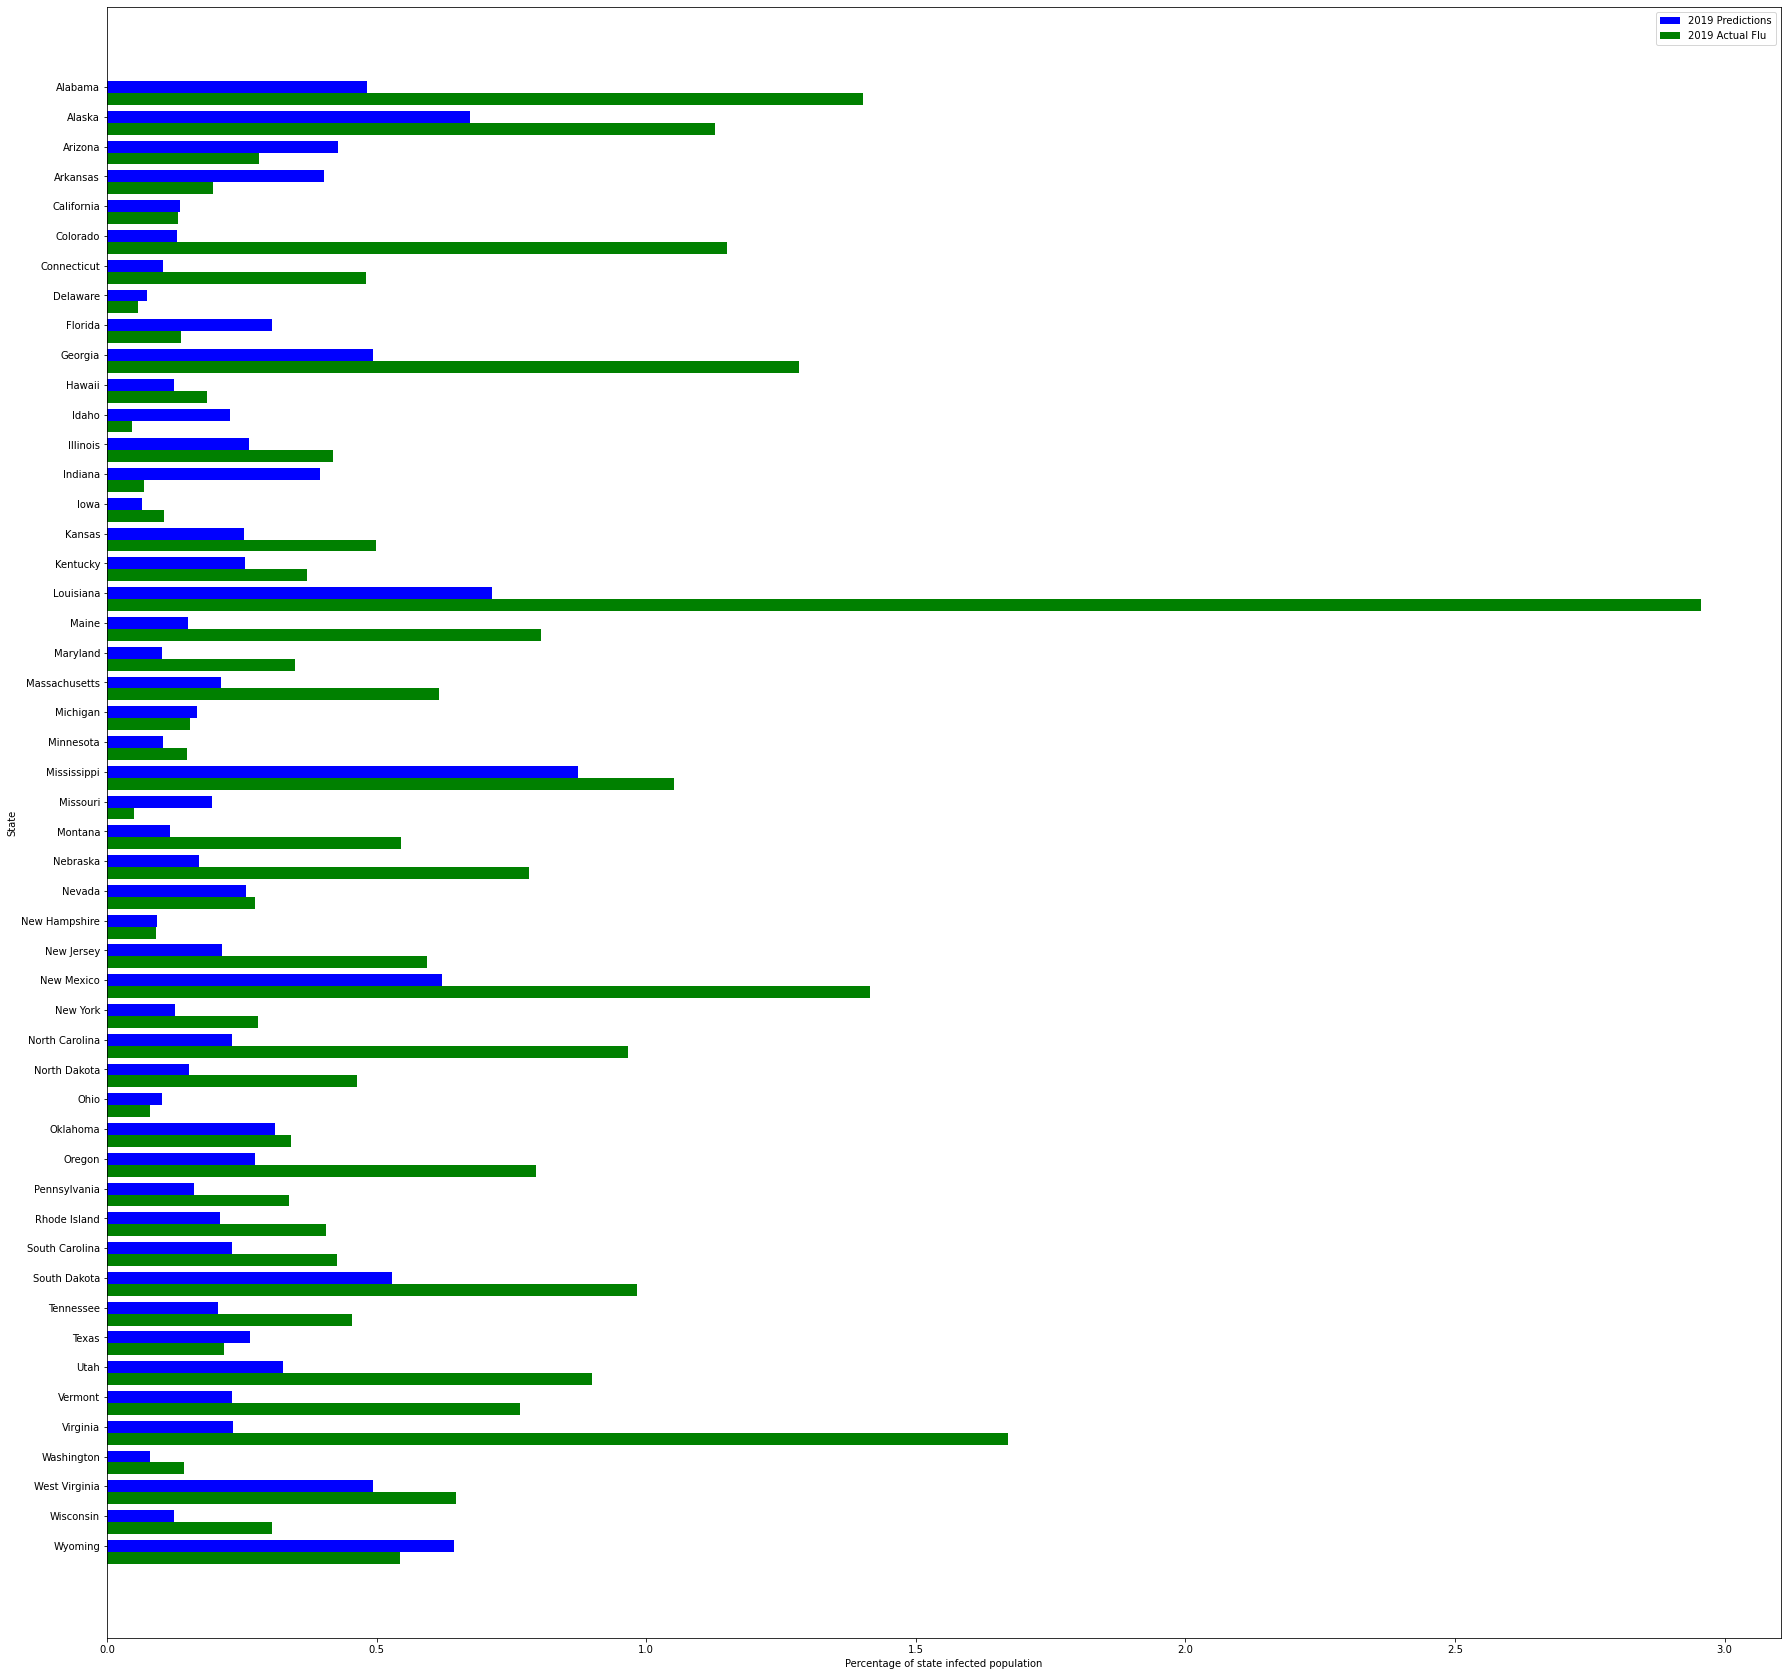

In [31]:
ind = np.arange(len(b))
width = .4

fig, ax = plt.subplots(figsize=(30, 30))
ax.barh(state_list, predictions_2019, width, color='blue',label='2019 Predictions')
ax.barh(ind + width, b, width, color='green', label='2019 Actual Flu')
plt.gca().invert_yaxis()

#ax.set(yticks=50, yticklabels=50, ylim=55)
ax.legend()
plt.ylabel("State")
plt.xlabel("Percentage of state infected population")
plt.savefig("2019_predictions_actuals.png")
plt.show()